In [34]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
from scipy.integrate import quad
from numpy import ones,copy,cos,tan,pi,linspace
from scipy.special import roots_legendre
from scipy.constants import h, c, k

Q1
Considere a função:

 

f(x)=xe−x 

 

Essa função descreve fenômenos com crescimento inicial e subsequente decaimento, como a taxa de resposta de alguns sistemas dissipativos, a distribuição de tempos de vida, e perfis de corrente ou energia com relaxação.

 

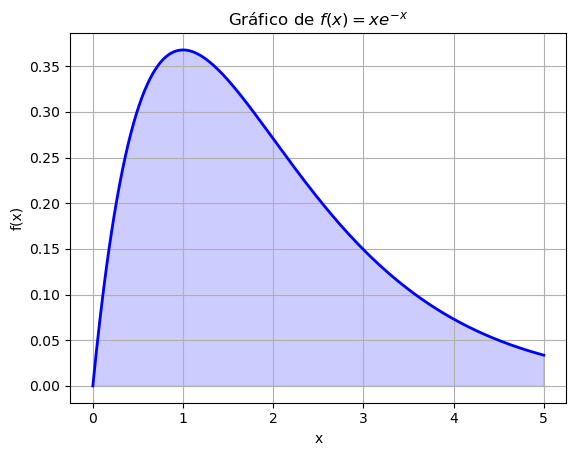

In [38]:
# Função
def f(x):
    return x * np.exp(-x)

# Plot
x = np.linspace(0, 5, 500)
plt.plot(x, f(x), 'b-', linewidth=2)
plt.fill_between(x, f(x), alpha=0.2, color='blue')
plt.title(r'Gráfico de $f(x) = xe^{-x}$')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.grid(True)
plt.show()

# Integral analítica
def F(x):
    return - (x + 1) * np.exp(-x)

integral_analitica = F(5) - F(0)  # ≈ 0.959572

In [ ]:
def trapezoidal_rule(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))
    return integral
print(f'Integral pelo método do trapézio: {trapezoidal_rule(0, 5, 100):.6f}')
error = abs(integral_analitica - trapezoidal_rule(0, 5, 100))
print(f'Erro: {error:.6f}')




Integral pelo método do trapézio: 0.959358
Erro: 0.021136


In [43]:
def simpson_rule(a, b, n):
    if n % 2 != 0:
        n += 1 
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))
    return integral
plt.show()
print(simpson_rule(0, 5, 10))  # Aproximação da integral usando a regra de Simpson
erro= abs(simpson_rule(0, 5, 10) - integral_analitica)
print(f"Erro: {erro:.6f}")

0.9585758072929125
Erro: 0.000997


In [48]:
ns = [10, 100, 1000]
trapezoidal_results = []
simpson_results = []

print("\nResultados numéricos:")
print("n\tTrapézio\tErro Trapézio\tSimpson\t\tErro Simpson")
for n in ns:
    trap_int = trapezoidal_rule(0, 5, n)
    simp_int = simpson_rule(0, 5, n)
    trapezoidal_results.append(trap_int)
    simpson_results.append(simp_int)
    
    trap_err = abs(trap_int - integral_analitica)
    simp_err = abs(simp_int - integral_analitica)
    
    print(f"{n}\t{trap_int:.8f}\t{trap_err:.4e}\t{simp_int:.8f}\t{simp_err:.4e}")




Resultados numéricos:
n	Trapézio	Erro Trapézio	Simpson		Erro Simpson
10	0.93843651	2.1136e-02	0.95857581	9.9651e-04
100	0.95935840	2.1392e-04	0.95957221	1.0458e-07
1000	0.95957018	2.1395e-06	0.95957232	1.0463e-11


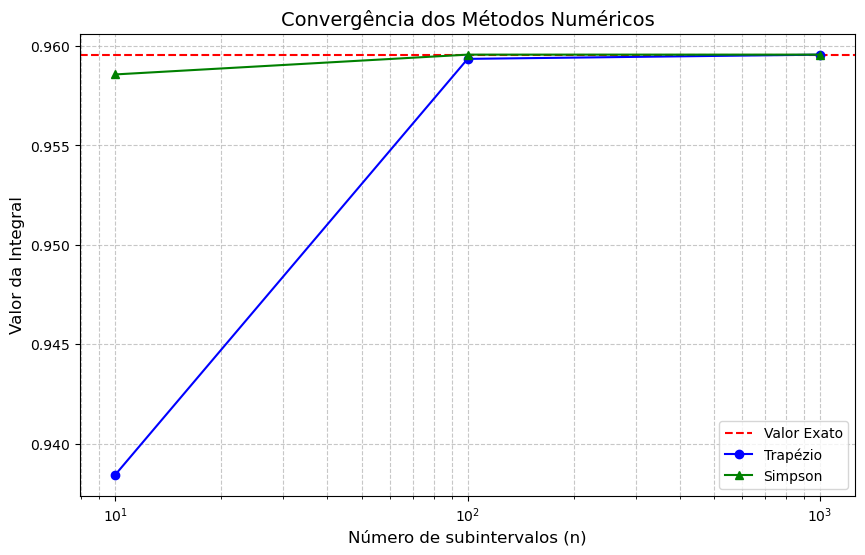

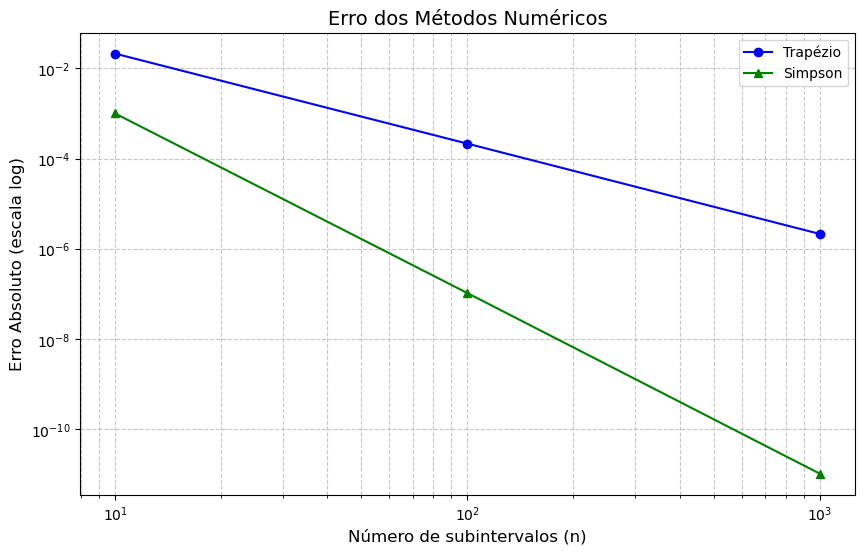

In [47]:
# Gráfico de convergência
plt.figure(figsize=(10, 6))
plt.axhline(y=integral_analitica, color='r', linestyle='--', label='Valor Exato')
plt.plot(ns, trapezoidal_results, 'bo-', label='Trapézio')
plt.plot(ns, simpson_results, 'g^-', label='Simpson')
plt.xscale('log')
plt.xlabel('Número de subintervalos (n)', fontsize=12)
plt.ylabel('Valor da Integral', fontsize=12)
plt.title('Convergência dos Métodos Numéricos', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de erro (escala logarítmica)
trap_errors = [abs(r - integral_analitica) for r in trapezoidal_results]
simp_errors = [abs(r - integral_analitica) for r in simpson_results]

plt.figure(figsize=(10, 6))
plt.plot(ns, trap_errors, 'bo-', label='Trapézio')
plt.plot(ns, simp_errors, 'g^-', label='Simpson')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de subintervalos (n)', fontsize=12)
plt.ylabel('Erro Absoluto (escala log)', fontsize=12)
plt.title('Erro dos Métodos Numéricos', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.show()

In [46]:
# e) Método Adaptativo de Simpson
def adaptive_simpson(a, b, tol=1e-6, max_depth=20):
    def recursive_simpson(a, b, tol, whole, fa, fb, fc, depth):
        c = (a + b) / 2
        h = (b - a) / 2
        d = (a + c) / 2
        e = (c + b) / 2
        fd = f(d)
        fe = f(e)
        
        left = h/6 * (fa + 4*fd + fc)
        right = h/6 * (fc + 4*fe + fb)
        integral_estimate = left + right
        
        if depth <= 0 or abs(integral_estimate - whole) <= 15*tol:
            return integral_estimate + (integral_estimate - whole)/15
        
        left_integral = recursive_simpson(a, c, tol/2, left, fa, fc, fd, depth-1)
        right_integral = recursive_simpson(c, b, tol/2, right, fc, fb, fe, depth-1)
        return left_integral + right_integral

    fa = f(a)
    fb = f(b)
    fc = f((a + b) / 2)
    whole = (b - a)/6 * (fa + 4*fc + fb)
    
    return recursive_simpson(a, b, tol, whole, fa, fb, fc, max_depth)

# Teste do método adaptativo
adapt_result = adaptive_simpson(0, 5, 1e-6)
adapt_error = abs(adapt_result - integral_analitica)
print(f"\nMétodo Adaptativo de Simpson: {adapt_result:.10f}")
print(f"Erro absoluto: {adapt_error:.4e}")

# Tabela comparativa final
print("\nTabela Comparativa Final:")
print("Método\t\t\tResultado\t\tErro Absoluto")
print(f"Trapézio (n=10)\t\t{trapezoidal_results[0]:.10f}\t{trap_errors[0]:.4e}")
print(f"Simpson (n=10)\t\t{simpson_results[0]:.10f}\t{simp_errors[0]:.4e}")
print(f"Trapézio (n=100)\t{trapezoidal_results[1]:.10f}\t{trap_errors[1]:.4e}")
print(f"Simpson (n=100)\t\t{simpson_results[1]:.10f}\t{simp_errors[1]:.4e}")
print(f"Adaptativo\t\t{adapt_result:.10f}\t{adapt_error:.4e}")


Método Adaptativo de Simpson: 0.9595723150
Erro absoluto: 2.9808e-09

Tabela Comparativa Final:
Método			Resultado		Erro Absoluto
Trapézio (n=10)		0.9384365144	2.1136e-02
Simpson (n=10)		0.9585758073	9.9651e-04
Trapézio (n=100)	0.9593583959	2.1392e-04
Simpson (n=100)		0.9595722134	1.0458e-07
Adaptativo		0.9595723150	2.9808e-09


Q2
A distribuição de velocidades das partículas em um gás ideal clássico em equilíbrio térmico é dada pela função de Maxwell-Boltzmann. Em sua forma adimensional, a densidade de probabilidade para a velocidade escalar v 
 é:

 

f(v)=4π(m2πkBT)3/2v2e−mv22kBT 

 

Neste exercício, consideramos a forma adimensional da função, onde x=vvmp 
 e vmp 
 é a velocidade mais provável. A função então se reduz a:

 

f(x)=x2e−x2 

 

A função está normalizada, e a média das velocidades pode ser obtida pela seguinte integral:

 

⟨x⟩=∫∞0x3e−x2dx 

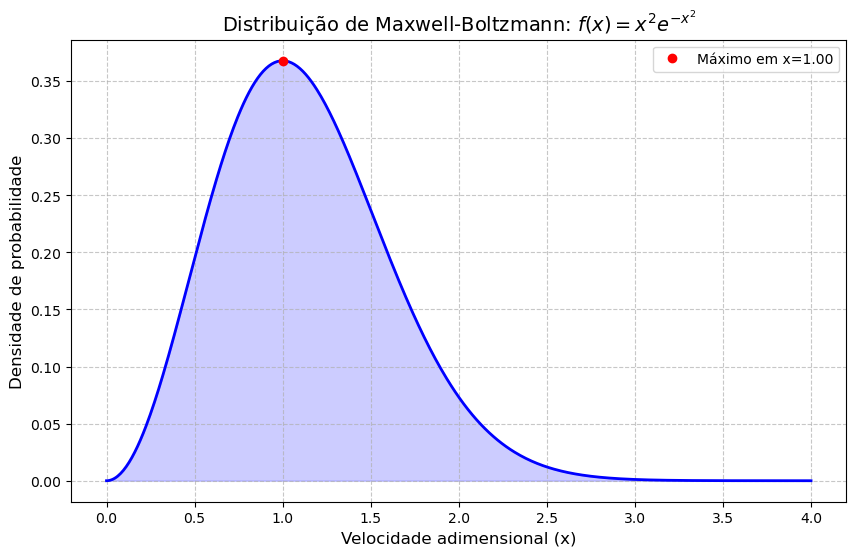

In [50]:
# Função de distribuição
def f(x):
    return x**2 * np.exp(-x**2)

# a) Plot da função e análise
x = np.linspace(0, 4, 500)
y = f(x)

# Encontrar o máximo
res = minimize_scalar(lambda x: -f(x), bounds=(0, 4), method='bounded')
x_max = res.x
y_max = f(x_max)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x_max, y_max, 'ro', label=f'Máximo em x={x_max:.2f}')
plt.title('Distribuição de Maxwell-Boltzmann: $f(x) = x^2 e^{-x^2}$', fontsize=14)
plt.xlabel('Velocidade adimensional (x)', fontsize=12)
plt.ylabel('Densidade de probabilidade', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.fill_between(x, y, alpha=0.2, color='blue')
plt.show()

In [ ]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w




def f(x):
	return x**3 * np.exp(-x**2)

N = 200
a = 0.0
b = 4.0
exact_value = 0.5 

# Calculando os pontos e pesos--------------------------------------
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Executando o metodo--------------------------------------
s = 0.0
for k in range(N):
	s += wp[k]*f(xp[k])

error = abs(s - exact_value)
print(f"Erro: {error:.6f}")

print("Quadratura de Gauss:\n", s)

Erro: 0.386228
Quadratura de Gauss:
 0.49999904345101476


In [28]:
def simpson_rule(a, b, n):
    if n % 2 != 0:
        n += 1 
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = x**3 * np.exp(-x**2)
    integral = h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))
    return integral
plt.show()
exact_value = 0.5
print(simpson_rule(0, 5, 100))  # Aproximação da integral usando a regra de Simpson
erro= abs(simpson_rule(0, 4, 10) -exact_value)
print(f"Erro: {erro:.6f}")

0.4999997902391204
Erro: 0.001387


Resultado Gaussiana (64 pts): 3.155381e-02 J/m³
Resultado Romberg (20 iter):  3.155381e-02 J/m³


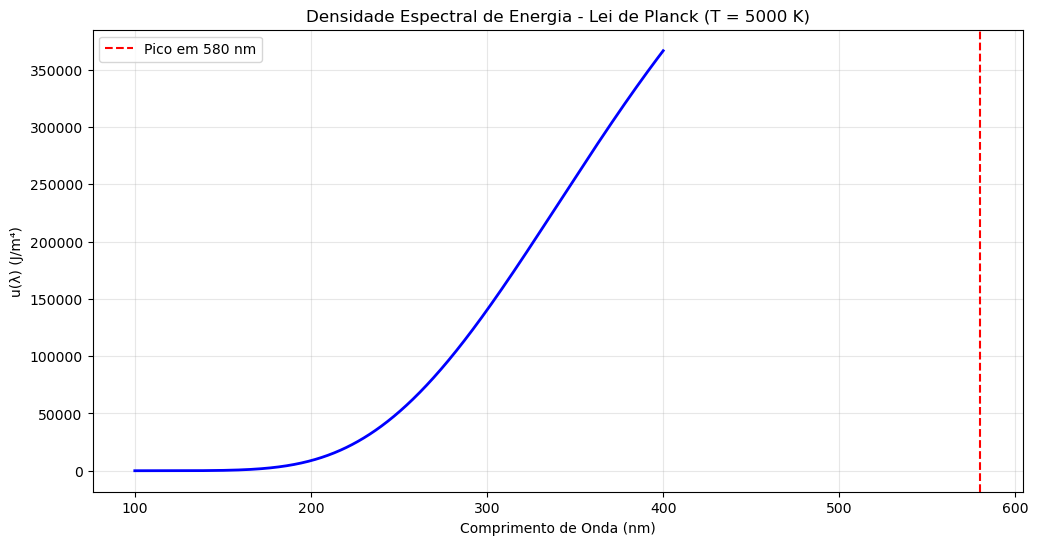

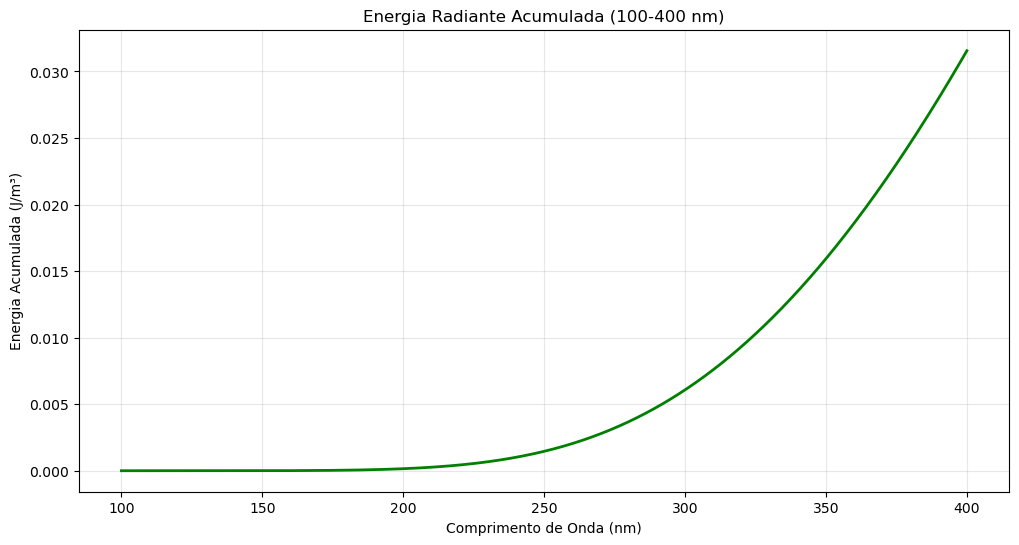

In [36]:
# Constantes físicas
T = 5000  # Temperatura em Kelvin
λ_min = 100e-9  # 100 nm em metros
λ_max = 400e-9  # 400 nm em metros

# Função integrando: Densidade espectral de energia (Lei de Planck)
def u(λ, T=T):
    exponent = h * c / (λ * k * T)
    numerator = 8 * np.pi * h * c
    denominator = λ**5 * (np.exp(exponent) - 1)
    return numerator / denominator

# ------------------------------------------------
# 1. Método de Quadratura Gaussiana
# ------------------------------------------------
def gauss_quadrature(f, a, b, n=64):
    """
    Calcula a integral de 'f' de 'a' a 'b' usando quadratura Gaussiana com 'n' pontos
    """
    # Obter nós e pesos para polinômios de Legendre
    x, w = roots_legendre(n)
    
    # Transformar do intervalo [-1, 1] para [a, b]
    t = 0.5 * (b - a) * x + 0.5 * (a + b)
    y = f(t)
    
    # Calcular a integral
    integral = np.sum(w * y) * 0.5 * (b - a)
    return integral

# ------------------------------------------------
# 2. Método de Romberg
# ------------------------------------------------
def romberg(f, a, b, max_iter=20, tol=1e-12):
    """
    Calcula a integral usando o método de Romberg
    """
    # Inicializar a matriz R
    R = np.zeros((max_iter, max_iter))
    
    # Primeira iteração (Regra do Trapézio com 1 intervalo)
    R[0, 0] = 0.5 * (b - a) * (f(a) + f(b))
    
    # Se max_iter for 1, retornar imediatamente
    if max_iter == 1:
        return R[0, 0], R[0:1, 0:1]
    
    # Iterações sucessivas
    last_i = 0  # Armazenar o último i válido
    for i in range(1, max_iter):
        # Refinamento da partição
        n_intervals = 2**i
        h_val = (b - a) / n_intervals  # Renomeado para evitar conflito
        
        # Calcular soma dos novos pontos
        total = 0.0
        for k in range(1, n_intervals, 2):
            total += f(a + k * h_val)
        
        # Atualizar estimativa
        R[i, 0] = 0.5 * R[i-1, 0] + h_val * total
        
        # Extrapolação de Richardson
        for j in range(1, i+1):
            factor = 4.0**j
            R[i, j] = (factor * R[i, j-1] - R[i-1, j-1]) / (factor - 1)
        
        last_i = i  # Atualizar último índice
        
        # Verificar convergência
        if abs(R[i, i] - R[i-1, i-1]) < tol:
            break
    
    return R[last_i, last_i], R[:last_i+1, :last_i+1]

# ------------------------------------------------
# Cálculo das integrais
# ------------------------------------------------
# Quadratura Gaussiana (64 pontos)
E_gauss = gauss_quadrature(u, λ_min, λ_max, n=64)

# Romberg (20 iterações)
E_romberg, R_matrix = romberg(u, λ_min, λ_max, max_iter=20)

print(f"Resultado Gaussiana (64 pts): {E_gauss:.6e} J/m³")
print(f"Resultado Romberg (20 iter):  {E_romberg:.6e} J/m³")

# ------------------------------------------------
# Visualização dos resultados
# ------------------------------------------------
# Gráfico da função integrando
λ_vals = np.linspace(λ_min, λ_max, 1000)
u_vals = u(λ_vals)

plt.figure(figsize=(12, 6))
plt.plot(λ_vals * 1e9, u_vals, 'b-', linewidth=2)
plt.title('Densidade Espectral de Energia - Lei de Planck (T = 5000 K)')
plt.xlabel('Comprimento de Onda (nm)')
plt.ylabel('u(λ) (J/m⁴)')
plt.grid(True, alpha=0.3)
plt.axvline(580, color='r', linestyle='--', label='Pico em 580 nm')
plt.legend()
plt.show()

# Gráfico da energia acumulada
accumulated = np.zeros_like(λ_vals)
for i, λ in enumerate(λ_vals):
    accumulated[i] = gauss_quadrature(u, λ_min, λ, n=32)

plt.figure(figsize=(12, 6))
plt.plot(λ_vals * 1e9, accumulated, 'g-', linewidth=2)
plt.title('Energia Radiante Acumulada (100-400 nm)')
plt.xlabel('Comprimento de Onda (nm)')
plt.ylabel('Energia Acumulada (J/m³)')
plt.grid(True, alpha=0.3)
plt.show()

# ------------------------------------------------
# Análise de Erro (Convergência)
# ------------------------------------------------
# Teste de convergência para Gaussiana
